In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Exploring The Data

In [45]:
data = pd.read_csv('Data/both_due.csv', encoding='latin-1', low_memory=False, dtype={'column_name': str})
data.sample(5)

,Sl,domain_name,zone_name,area_name,branch_name,branch_code,Samity,branc_code,Member_code,Member_name,...,Loan_disburse_date,Disburse_amount,Last_transaction_date,Date_last_installment,Present_loan_amount,Due_amount,Saving_balance,Member,Organization,Day_expire
228133,228143,OP-10,Comilla East,Chandina,Dollai Nababpur,526,526,526,0526-303-Kongai S.M.S 303,0526-303-0025,...,NaN,43706,15/09/1965,25/06/2022,44226.00,13912.28,13912.28,110.0,0.00,13802.28
116922,116929,OP-5,Noakhali,Noakhali,Noakhali,119,0119-064-Binodpur S.M.S 064,119,119,0119-064-0142,...,NaN,43848,18/02/1982,23/06/2022,44289.00,12212.39,12212.39,100.0,0.00,12112.39
124701,124708,OP-5,Chittagong North,Pahartali,Pahartali,485,0485-024-Beltoli S.M.S 024,485,485,0485-024-0033,...,NaN,42886,03/10/1954,20/06/2022,43242.00,9413.82,9413.82,100.0,0.00,9313.82
178426,178436,OP-7,Sylhet,Sylhet,Balaganj,183,0183-078-Mullapara S.M.S,183,0183-078-0025,Rahena Khanom,...,26/07/2023,50000,30/11/2023,27/07/2024,34603.52,1255.51,5406.00,0.0,29197.52,NaN
84355,84359,OP-4,Rangpur,Rangpur,Jalkar-1,116,0116-054-Jummapara S.M.S 054,116,0116-054-1600,Mst.Baby Begum,...,06/02/2021,25000,21/06/2022,15/03/2022,3541.26,3541.26,100.00,0.0,3441.26,625.00


In [46]:
# show all null values
data.isnull().sum()

Sl                           0
domain_name                  0
zone_name                    0
area_name                    0
branch_name                  0
branch_code                  0
Samity                       0
branc_code                   0
Member_code                  0
Member_name                  0
Spouse_name                  0
Mobile_no                29742
Component_name             256
Loan_code                    0
Loan_cycle                   0
Loan_disburse_date       28107
Disburse_amount              0
Last_transaction_date      133
Date_last_installment       32
Present_loan_amount          1
Due_amount                   1
Saving_balance               1
Member                     490
Organization              1033
Day_expire               61766
dtype: int64

In [47]:
# show the datatpe of each column
data.dtypes

Sl                         int64
domain_name               object
zone_name                 object
area_name                 object
branch_name               object
branch_code                int64
Samity                    object
branc_code                 int64
Member_code               object
Member_name               object
Spouse_name               object
Mobile_no                float64
Component_name            object
Loan_code                 object
Loan_cycle                object
Loan_disburse_date        object
Disburse_amount            int64
Last_transaction_date     object
Date_last_installment     object
Present_loan_amount      float64
Due_amount               float64
Saving_balance           float64
Member                   float64
Organization             float64
Day_expire               float64
dtype: object

## Data Visualization

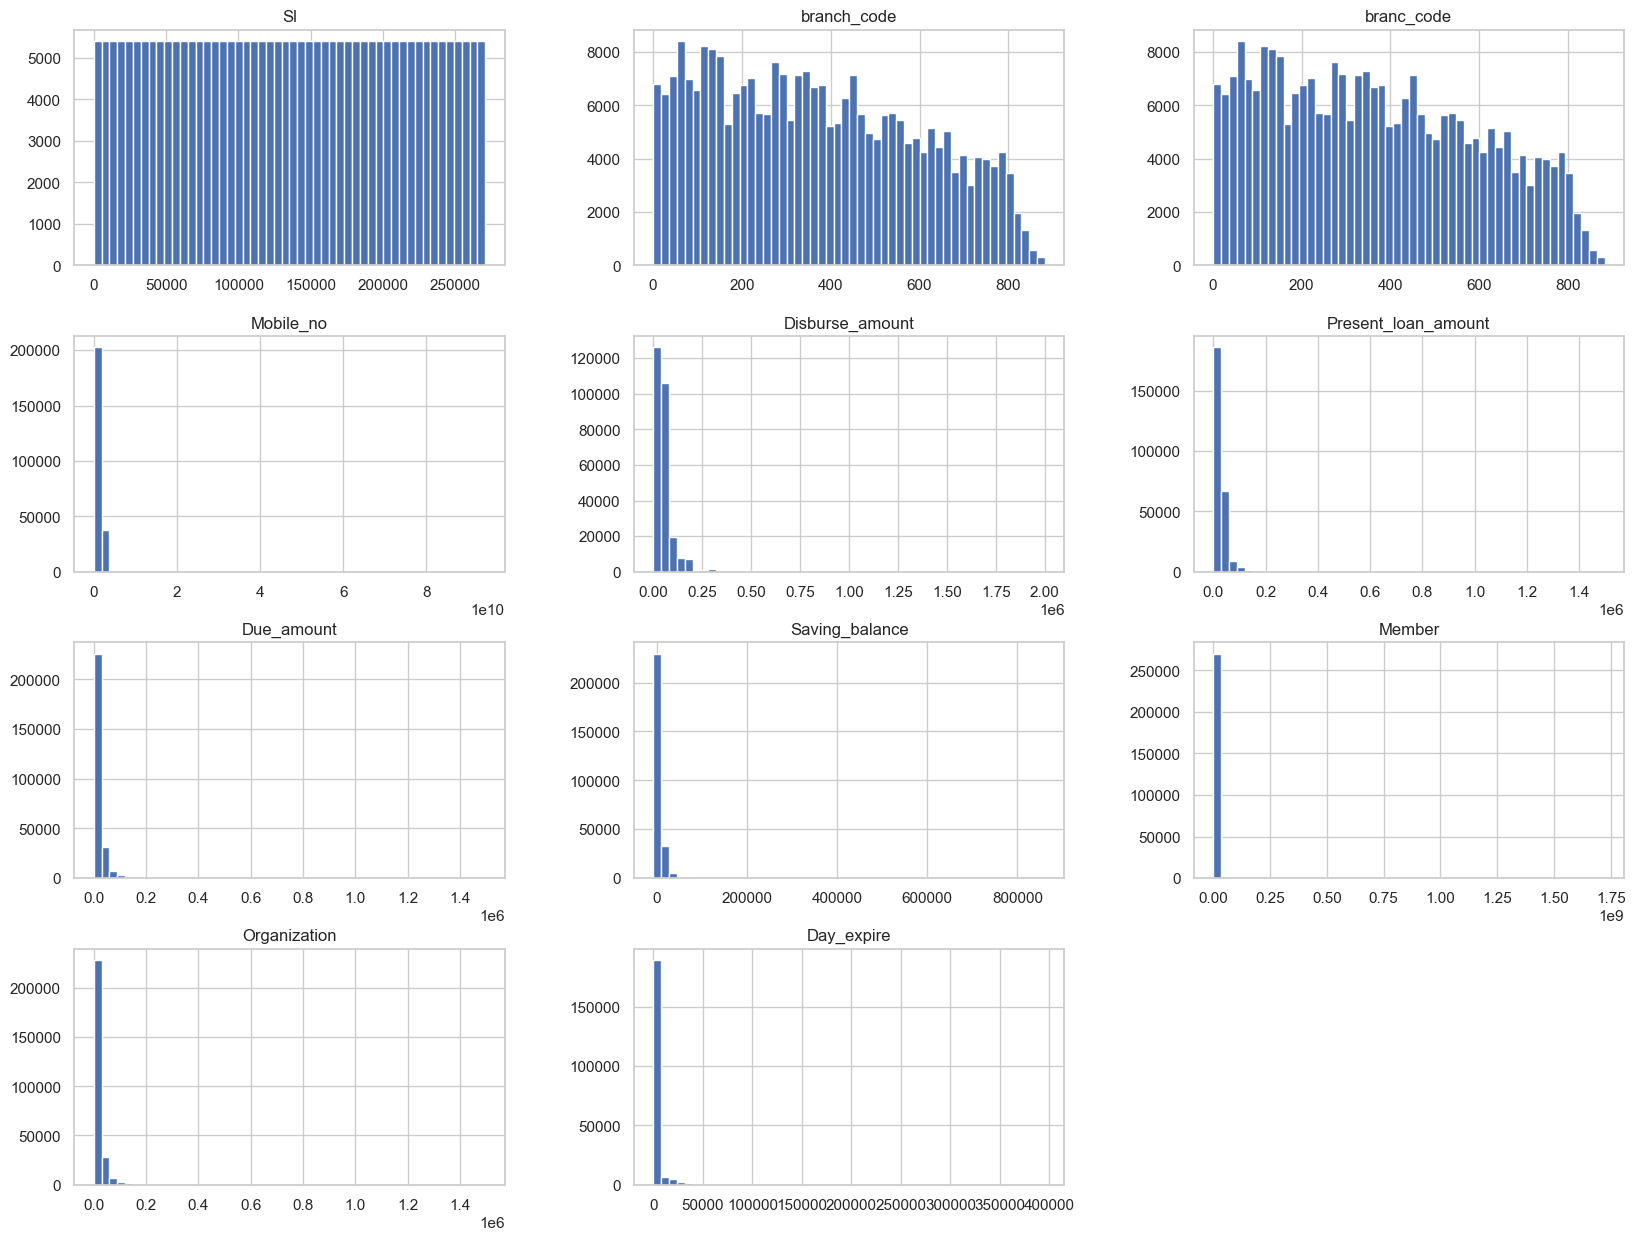

In [48]:
# plot a histogram of the data
data.hist(bins=50, figsize=(20,15))
plt.show()

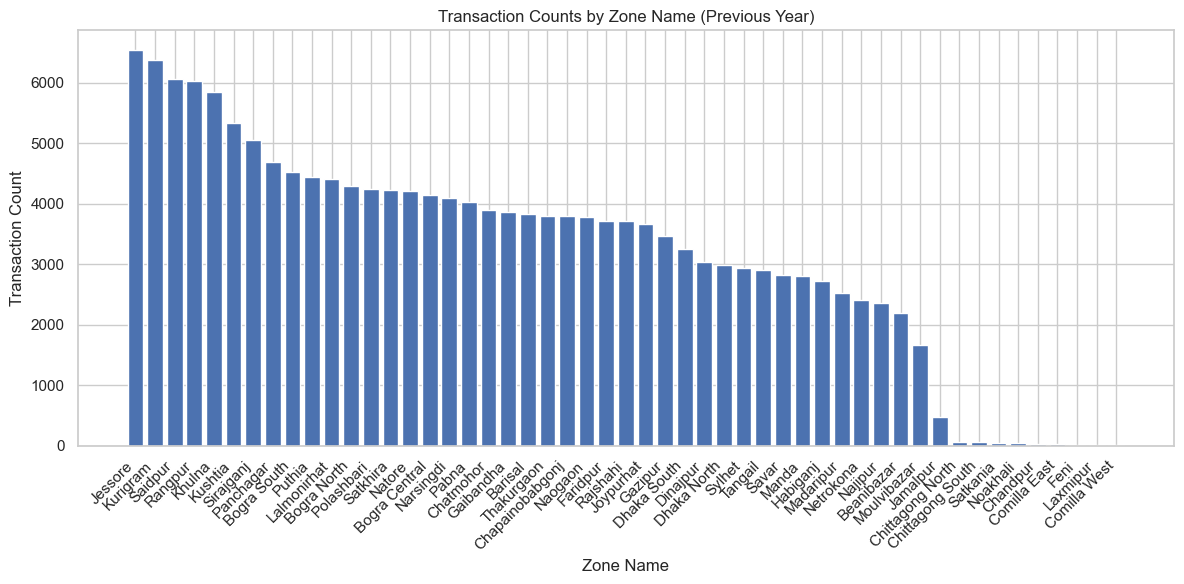

In [49]:
try:
    # Filter data for transactions from the previous year
    zone_name_previous_year = data[pd.to_datetime(data['Last_transaction_date'], format='%d/%m/%Y', dayfirst=True, errors='coerce')
                                   .dt.year == (pd.to_datetime('today').year - 1)]

    # Check if there's any data to plot
    if not zone_name_previous_year.empty:
        # Count the occurrences of each 'zone_name'
        zone_counts = zone_name_previous_year['zone_name'].value_counts()

        # Create a bar plot with rotated x-axis labels for readability
        plt.figure(figsize=(12, 6))
        plt.bar(zone_counts.index, zone_counts.values)
        plt.xticks(rotation=45, ha='right')  # Rotate and align labels

        # Customize plot labels and title
        plt.xlabel('Zone Name')
        plt.ylabel('Transaction Count')
        plt.title('Transaction Counts by Zone Name (Previous Year)')

        # Show the plot
        plt.tight_layout()  # Ensure labels fit in the plot
        plt.show()
    else:
        print("No data available for the previous year.")
except pd.errors.OutOfBoundsDatetime:
    print("Error: Out of bounds nanosecond timestamp. Please check the format of 'Last_transaction_date'.")

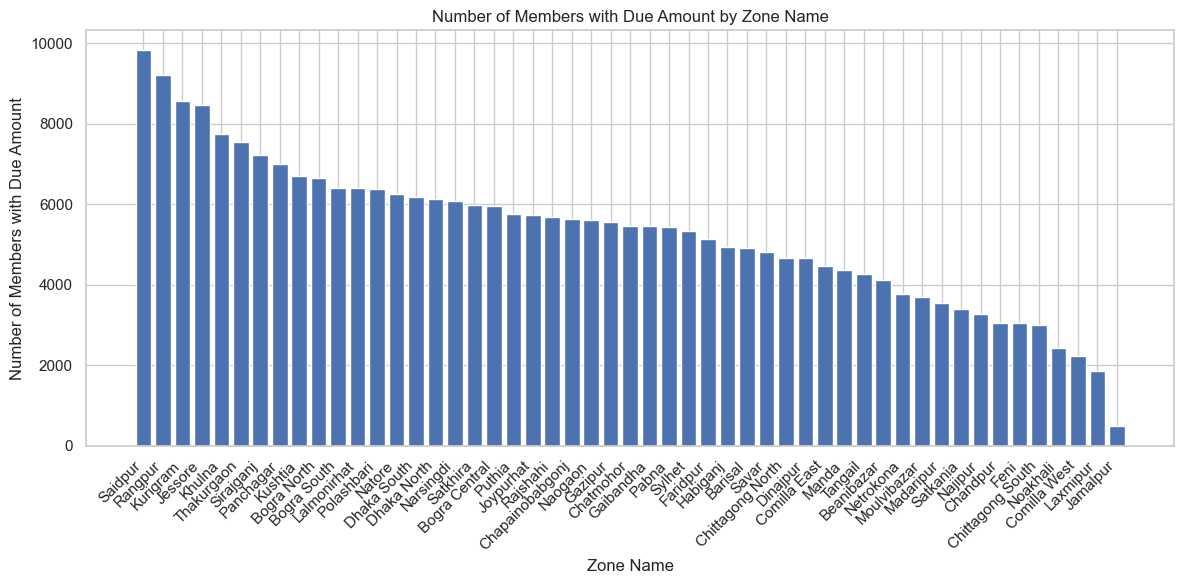

In [50]:
try:
    # Filter data for transactions with Due_amount and count the occurrences of each 'zone_name' with Due_amount
    zone_due_amount_counts = data.loc[data['Due_amount'].notnull() & (data['Due_amount'] > 0), 'zone_name'].value_counts()

    # Create a bar plot with rotated x-axis labels for readability
    plt.figure(figsize=(12, 6))
    plt.bar(zone_due_amount_counts.index, zone_due_amount_counts.values)
    plt.xticks(rotation=45, ha='right')  # Rotate and align labels

    # Customize plot labels and title
    plt.xlabel('Zone Name')
    plt.ylabel('Number of Members with Due Amount')
    plt.title('Number of Members with Due Amount by Zone Name')

    # Show the plot
    plt.tight_layout()  # Ensure labels fit in the plot
    plt.show()
except pd.errors.OutOfBoundsDatetime:
    print("Error: Out of bounds nanosecond timestamp. Please check the format of 'Last_transaction_date'.")

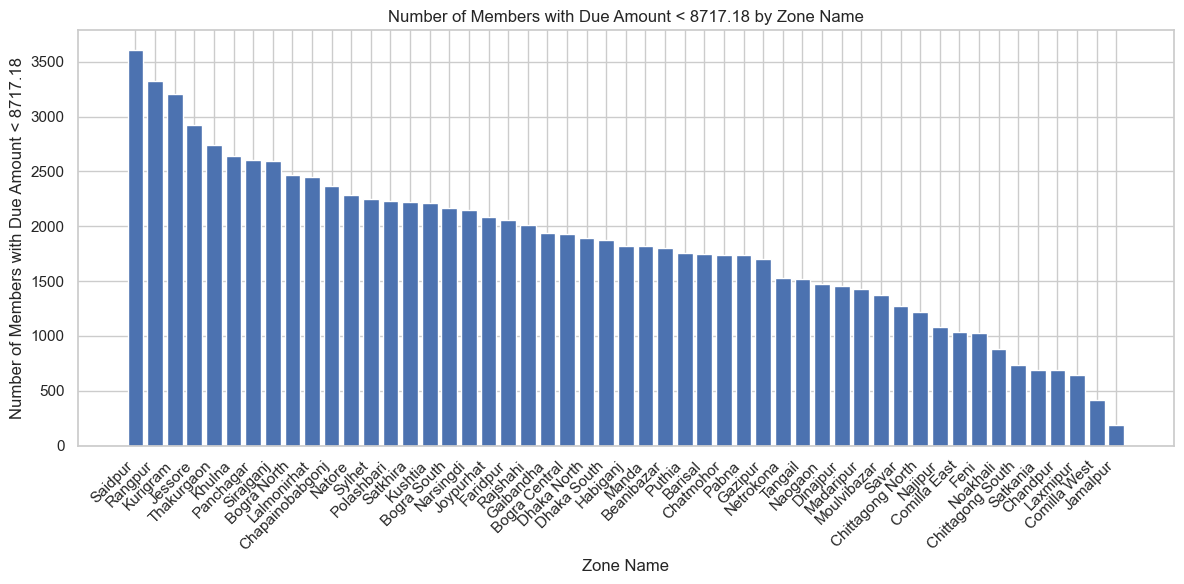

Member names for transactions with Due_amount less than 8717.18:
13                   Sobus
14           Mst.Rubi Bibi
16           Mst Hena Bibi
24        Mst Resma Khatun
31             Finsi Aktar
                ...       
270498        Rehena Akter
270499          Rina Akter
270500         Jhuma Akter
270501                Akhi
270502       Shefali Akter
Name: Member_name, Length: 92971, dtype: object


In [51]:
try:
    # Filter data for transactions with Due_amount less than 8717.18 and count the occurrences of each 'zone_name' with Due_amount
    filtered_data = data.loc[data['Due_amount'].notnull() & (data['Due_amount'] < 8717.18)]
    zone_due_amount_counts = filtered_data['zone_name'].value_counts()

    # Create a bar plot with rotated x-axis labels for readability
    plt.figure(figsize=(12, 6))
    plt.bar(zone_due_amount_counts.index, zone_due_amount_counts.values)
    plt.xticks(rotation=45, ha='right')  # Rotate and align labels

    # Customize plot labels and title
    plt.xlabel('Zone Name')
    plt.ylabel('Number of Members with Due Amount < 8717.18')
    plt.title('Number of Members with Due Amount < 8717.18 by Zone Name')

    # Show the plot
    plt.tight_layout()  # Ensure labels fit in the plot
    plt.show()

    # Show Member names
    print("Member names for transactions with Due_amount less than 8717.18:")
    print(filtered_data['Member_name'])
except pd.errors.OutOfBoundsDatetime:
    print("Error: Out of bounds nanosecond timestamp. Please check the format of 'Last_transaction_date'.")


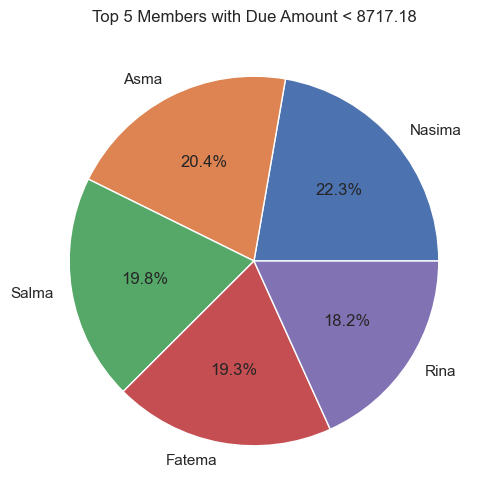

In [52]:
try:
    # Filter data for transactions with Due_amount less than 8717.18 and count the occurrences of each 'Member_name' with Due_amount
    filtered_data = data.loc[data['Due_amount'].notnull() & (data['Due_amount'] < 8717.18)]
    member_due_amount_counts = filtered_data['Member_name'].value_counts()

    # Get the top 5 members with the highest counts
    top_members = member_due_amount_counts[:5]

    # Create a pie chart
    plt.figure(figsize=(10, 6))
    plt.pie(top_members.values, labels=top_members.index, autopct='%1.1f%%')

    # Customize plot title
    plt.title('Top 5 Members with Due Amount < 8717.18')

    # Show the plot
    plt.show()
except pd.errors.OutOfBoundsDatetime:
    print("Error: Out of bounds nanosecond timestamp. Please check the format of 'Last_transaction_date'.")

C:\Users\Shakil\AppData\Local\Temp\ipykernel_19544\2694016865.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(transaction_counts.index, rotation=0, va='center')


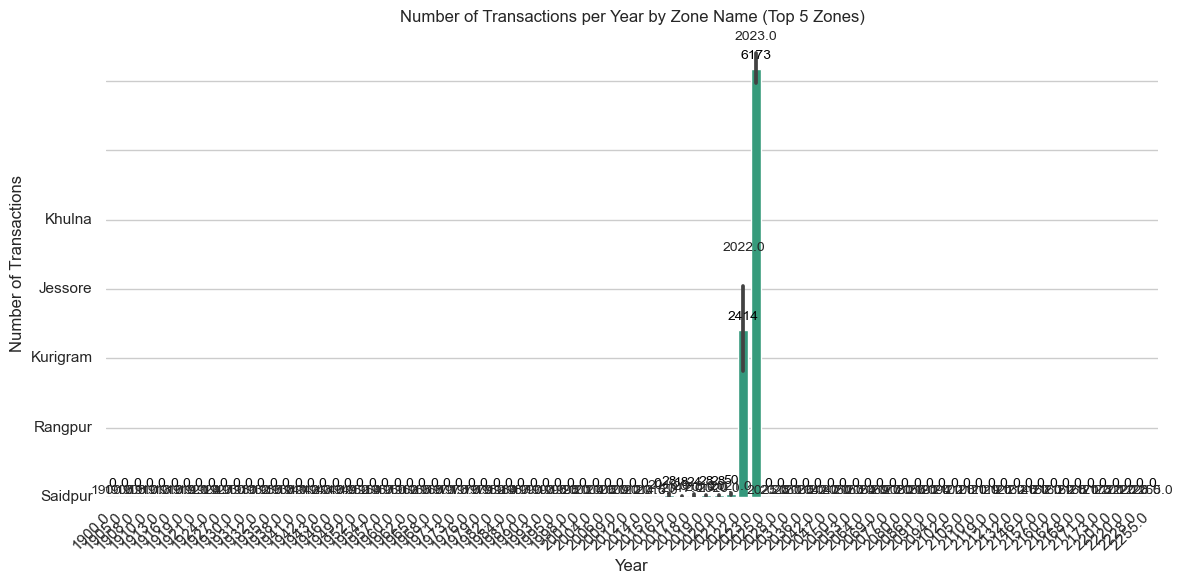

In [53]:
# Convert 'Last_transaction_date' to datetime with dayfirst=True
data['Last_transaction_date'] = pd.to_datetime(data['Last_transaction_date'], errors='coerce', dayfirst=True)

# Group by 'zone_name' and 'Last_transaction_date' (year) and count the number of transactions
transaction_counts = data.groupby(['zone_name', data['Last_transaction_date'].dt.year]).size().unstack().fillna(0)

# Remove years with no transactions
transaction_counts = transaction_counts.loc[:, (transaction_counts != 0).any(axis=0)]

# Sort by total transactions and keep only the top 5 zones
transaction_counts['Total'] = transaction_counts.sum(axis=1)
transaction_counts = transaction_counts.nlargest(5, 'Total').drop(columns='Total')

# Create a stylish stacked bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')  # Set a white grid background
ax = sns.barplot(data=transaction_counts, palette='viridis')

# Customize plot labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of Transactions')
ax.set_title('Number of Transactions per Year by Zone Name (Top 5 Zones)')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Remove both x and y-axis spines (borders)
sns.despine(left=True, bottom=True)

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Rotate and align y-axis labels for better readability
ax.set_yticklabels(transaction_counts.index, rotation=0, va='center')

# Place zone names on top of each graph
for i, col in enumerate(transaction_counts.columns):
    ax.text(i, transaction_counts[col].max(), col, ha='center', va='bottom', rotation=0, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [54]:
data.describe()

,Sl,branch_code,branc_code,Mobile_no,Disburse_amount,Last_transaction_date,Present_loan_amount,Due_amount,Saving_balance,Member,Organization,Day_expire
count,270503.000000,270503.000000,270503.000000,2.407610e+05,2.705030e+05,266860,2.705020e+05,2.705020e+05,270502.000000,2.700130e+05,2.694700e+05,208737.000000
mean,135258.050317,366.567990,366.567990,1.749707e+09,5.599664e+04,2024-12-25 17:20:59.500861952,2.622090e+04,1.958301e+04,5848.544038,6.890113e+03,1.793146e+04,3529.741433
min,1.000000,1.000000,1.000000,1.880200e+05,2.000000e+03,1900-01-01 00:00:00,8.900000e-01,8.900000e-01,-7027.000000,0.000000e+00,0.000000e+00,0.000000
25%,67629.500000,163.000000,163.000000,1.723274e+09,3.000000e+04,2022-10-11 00:00:00,9.322097e+03,6.519820e+03,100.000000,0.000000e+00,4.190025e+03,283.000000
50%,135258.000000,346.000000,346.000000,1.755375e+09,4.386000e+04,2023-06-24 00:00:00,1.862467e+04,1.295154e+04,3351.000000,0.000000e+00,1.150324e+04,712.000000
75%,202886.500000,549.000000,549.000000,1.793985e+09,5.000000e+04,2023-10-31 00:00:00,3.656388e+04,2.326264e+04,6906.000000,0.000000e+00,2.219558e+04,1017.000000
max,270513.000000,882.000000,882.000000,9.415182e+10,2.000000e+06,2255-12-04 00:00:00,1.496733e+06,1.496733e+06,860951.000000,1.722356e+09,1.496733e+06,395516.710000
std,78090.565949,230.560216,230.560216,5.232587e+08,5.431754e+04,NaN,2.930779e+04,2.540436e+04,11062.111015,3.314597e+06,2.594977e+04,12631.646625


## Data Cleaning

In [55]:
# add Member_name
work_data = data[['Loan_cycle', 'Disburse_amount', 'Last_transaction_date', 'Date_last_installment', 'Present_loan_amount', 'Saving_balance', 'Day_expire', 'Due_amount']]
work_data.sample(5)

,Loan_cycle,Disburse_amount,Last_transaction_date,Date_last_installment,Present_loan_amount,Saving_balance,Day_expire,Due_amount
240434,7,80000,2022-06-26,13/04/2021,42888.50,620.00,961.00,42888.50
101676,1,25000,2023-11-15,09/04/2024,13260.87,2600.00,NaN,3540.37
228906,R,44902,2173-10-14,27/09/2023,45260.00,19112.69,5849.69,19112.69
200443,1,50000,2023-08-12,23/10/2023,13895.30,5872.00,38.00,13895.30
18491,7,190000,2023-11-25,19/05/2021,93859.65,17094.00,925.00,93859.65


In [56]:
work_data.describe()

,Disburse_amount,Last_transaction_date,Present_loan_amount,Saving_balance,Day_expire,Due_amount
count,2.705030e+05,266860,2.705020e+05,270502.000000,208737.000000,2.705020e+05
mean,5.599664e+04,2024-12-25 17:20:59.500861952,2.622090e+04,5848.544038,3529.741433,1.958301e+04
min,2.000000e+03,1900-01-01 00:00:00,8.900000e-01,-7027.000000,0.000000,8.900000e-01
25%,3.000000e+04,2022-10-11 00:00:00,9.322097e+03,100.000000,283.000000,6.519820e+03
50%,4.386000e+04,2023-06-24 00:00:00,1.862467e+04,3351.000000,712.000000,1.295154e+04
75%,5.000000e+04,2023-10-31 00:00:00,3.656388e+04,6906.000000,1017.000000,2.326264e+04
max,2.000000e+06,2255-12-04 00:00:00,1.496733e+06,860951.000000,395516.710000,1.496733e+06
std,5.431754e+04,NaN,2.930779e+04,11062.111015,12631.646625,2.540436e+04


In [57]:
print("The Mean of Due_amount is: ", work_data['Due_amount'].mean())

The Mean of Due_amount is:  19583.012722678573


## Checking for Missing Values

In [58]:
work_data.dtypes

Loan_cycle                       object
Disburse_amount                   int64
Last_transaction_date    datetime64[ns]
Date_last_installment            object
Present_loan_amount             float64
Saving_balance                  float64
Day_expire                      float64
Due_amount                      float64
dtype: object

In [59]:
# show all null values
work_data.isnull().sum()

Loan_cycle                   0
Disburse_amount              0
Last_transaction_date     3643
Date_last_installment       32
Present_loan_amount          1
Saving_balance               1
Day_expire               61766
Due_amount                   1
dtype: int64

In [60]:
# remove all rows with null values and duplicate rows in work_data
work_data = work_data.dropna()
work_data = work_data.drop_duplicates()

In [61]:
# show duplicate rows
work_data[work_data.duplicated()]
# drop duplicate rows
work_data = work_data.drop_duplicates()

In [62]:
work_data.isnull().sum()
# show all null with duplicate values
work_data[work_data.isnull().any(axis=1)]

,Loan_cycle,Disburse_amount,Last_transaction_date,Date_last_installment,Present_loan_amount,Saving_balance,Day_expire,Due_amount


In [63]:
work_data.dtypes

Loan_cycle                       object
Disburse_amount                   int64
Last_transaction_date    datetime64[ns]
Date_last_installment            object
Present_loan_amount             float64
Saving_balance                  float64
Day_expire                      float64
Due_amount                      float64
dtype: object

In [64]:
# Working with Last_transaction_date
work_data['Last_transaction_Year'] = work_data['Last_transaction_date'].dt.year.fillna(-1).astype('int64')
work_data['Last_transaction_Month'] = work_data['Last_transaction_date'].dt.month.fillna(-1).astype('int64')
work_data['Last_transaction_Day'] = work_data['Last_transaction_date'].dt.day.fillna(-1).astype('int64')
work_data = work_data.drop('Last_transaction_date', axis=1)
# Working with Date_last_installment
work_data['Date_last_installment'] = pd.to_datetime(work_data['Date_last_installment'], dayfirst=True, errors='coerce')
work_data['Date_last_installment_Year'] = work_data['Date_last_installment'].dt.year.fillna(-1).astype('int64')
work_data['Date_last_installment_Month'] = work_data['Date_last_installment'].dt.month.fillna(-1).astype('int64')
work_data['Date_last_installment_Day'] = work_data['Date_last_installment'].dt.day.fillna(-1).astype('int64')
work_data = work_data.drop('Date_last_installment', axis=1)

In [65]:
# show datatypes
work_data.dtypes

Loan_cycle                      object
Disburse_amount                  int64
Present_loan_amount            float64
Saving_balance                 float64
Day_expire                     float64
Due_amount                     float64
Last_transaction_Year            int64
Last_transaction_Month           int64
Last_transaction_Day             int64
Date_last_installment_Year       int64
Date_last_installment_Month      int64
Date_last_installment_Day        int64
dtype: object

In [66]:
# Print the original number of duplicates and null values
print("Number of duplicates in Loan_cycle: ", work_data['Loan_cycle'].duplicated().sum())
print("Number of null values in Loan_cycle: ", work_data['Loan_cycle'].isnull().sum())

# Convert non-numeric values to NaN
work_data['Loan_cycle'] = pd.to_numeric(work_data['Loan_cycle'], errors='coerce')

# Replace NaN values with the median of the column
median_value = work_data['Loan_cycle'].median()
work_data['Loan_cycle'].fillna(median_value, inplace=True)

# Remove duplicates in Loan_cycle
work_data.drop_duplicates(subset=['Loan_cycle'], keep='first', inplace=True)

# Convert Loan_cycle to int64
work_data['Loan_cycle'] = work_data['Loan_cycle'].astype('int64')

# Print the updated number of duplicates
print("Number of duplicates in Loan_cycle (after fixing): ", work_data['Loan_cycle'].duplicated().sum())

Number of duplicates in Loan_cycle:  205009
Number of null values in Loan_cycle:  0
Number of duplicates in Loan_cycle (after fixing):  0


In [67]:
work_data.sample(5)

,Loan_cycle,Disburse_amount,Present_loan_amount,Saving_balance,Day_expire,Due_amount,Last_transaction_Year,Last_transaction_Month,Last_transaction_Day,Date_last_installment_Year,Date_last_installment_Month,Date_last_installment_Day
1,4,50000,13758.65,10581.0,23.0,13758.65,2023,10,31,2023,11,7
1157,9,35000,10904.00,100.0,711.0,10904.00,2022,10,16,2021,12,19
0,1,25000,11862.83,142.0,919.0,11862.83,2022,6,25,2021,5,25
1787,0,30000,18903.00,100.0,719.0,18903.00,2023,7,30,2021,12,11
59,6,90000,47599.12,17368.0,266.0,47599.12,2023,11,29,2023,3,9


In [68]:
# show the data types of each column
work_data.dtypes

Loan_cycle                       int64
Disburse_amount                  int64
Present_loan_amount            float64
Saving_balance                 float64
Day_expire                     float64
Due_amount                     float64
Last_transaction_Year            int64
Last_transaction_Month           int64
Last_transaction_Day             int64
Date_last_installment_Year       int64
Date_last_installment_Month      int64
Date_last_installment_Day        int64
dtype: object

In [69]:
# convert Present_loan_amount, Saving_balance, Day_expire, Due_amount to int64
mean_value_present_loan = work_data['Present_loan_amount'].mean()
work_data['Present_loan_amount'].fillna(mean_value_present_loan, inplace=True)
work_data['Present_loan_amount'] = work_data['Present_loan_amount'].astype('int64')

mean_value_saving_balance = work_data['Saving_balance'].mean()
work_data['Saving_balance'].fillna(mean_value_saving_balance, inplace=True)
work_data['Saving_balance'] = work_data['Saving_balance'].astype('int64')

mean_value_day_expire = work_data['Day_expire'].mean()
work_data['Day_expire'].fillna(mean_value_day_expire, inplace=True)
work_data['Day_expire'] = work_data['Day_expire'].astype('int64')

mean_value_due_amount = work_data['Due_amount'].mean()
work_data['Due_amount'].fillna(mean_value_due_amount, inplace=True)
work_data['Due_amount'] = work_data['Due_amount'].astype('int64')

In [70]:
# show the data types of each column
work_data.dtypes

Loan_cycle                     int64
Disburse_amount                int64
Present_loan_amount            int64
Saving_balance                 int64
Day_expire                     int64
Due_amount                     int64
Last_transaction_Year          int64
Last_transaction_Month         int64
Last_transaction_Day           int64
Date_last_installment_Year     int64
Date_last_installment_Month    int64
Date_last_installment_Day      int64
dtype: object

In [71]:
features = work_data[['Loan_cycle', 'Disburse_amount', 'Present_loan_amount', 'Saving_balance', 'Day_expire', 'Last_transaction_Year', 'Last_transaction_Month', 'Last_transaction_Day', 'Date_last_installment_Year', 'Date_last_installment_Month', 'Date_last_installment_Day']].values
label = work_data[['Due_amount']].values

In [72]:
features.shape

(10, 11)

In [73]:
label.shape

(10, 1)

In [74]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [75]:
from sklearn.linear_model import LinearRegression

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [76]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]


In [77]:
print("The intercept for our model is {:.4}".format(intercept))
print("The coefficient for our model is {:.4}".format(coefficent))

The intercept for our model is 0.01913
The coefficient for our model is -2.063e-05


In [78]:
y_pred = regression_model.predict(X_test)

In [79]:
# Let's compare the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1 = df.head(10)

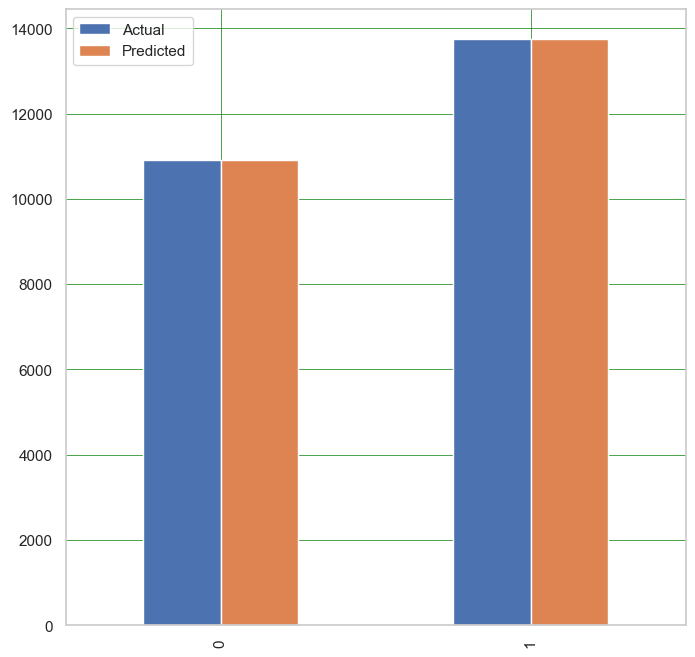

In [80]:
df1.plot(kind = 'bar', figsize = (8,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [81]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0004488261629376211
Mean Squared Error: 3.8682274410020576e-07
Root Mean Squared Error: 0.000621950756973738


In [85]:
# See Model Performance with mean value and root mean squared error
mean_due_amount = work_data['Due_amount'].mean()
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Due Amount:', mean_due_amount)
print('Root Mean Squared Error:', rmse)
difference = abs(mean_due_amount - rmse)
percentage_difference = (difference / mean_due_amount) * 100
print('Percentage difference between Mean Due Amount and Root Mean Squared Error:', percentage_difference)
accuracy = regression_model.score(X_test, y_test)
print('Accuracy of the model:', accuracy*100, '%')

Mean Due Amount: 61095.9
Root Mean Squared Error: 0.000621950756973738
Percentage difference between Mean Due Amount and Root Mean Squared Error: 99.999998982009
Accuracy of the model: 99.999999999981 %


In [86]:
import pickle
 
# Save the model as a pickle file
with open('ngo.pkl', 'wb') as file:
    pickle.dump(regression_model, file)
 
# Load the model from the pickle file
with open('ngo.pkl', 'rb') as file:
    ngo = pickle.load(file)